In [6]:
# The Callable is any object that can be called (funct, method, class)
from typing import List, Tuple, Dict, Union, Callable
import matplotlib.pyplot as plt
import numpy as np

Construct a function which iterates the logistic equation

In [2]:
from src.utils import logistic_eq_iterator

In [3]:
logistic_eq_iterator(3.9999, 0.1, 40)

[0.1,
 0.359991,
 0.9215668799,
 0.2891182349,
 0.8220949717,
 0.5850046913,
 0.9710725324,
 0.1123598678,
 0.3989305381,
 0.959115877,
 0.1568465247,
 0.528969545,
 0.9966181458,
 0.013481332,
 0.0531970128,
 0.2014633258,
 0.643487329,
 0.9176226045,
 0.3023578817,
 0.8437292785,
 0.5273875474,
 0.996974764,
 0.0120640342,
 0.0476727813,
 0.1815958089,
 0.5944602225,
 0.9642849577,
 0.1377544683,
 0.4751008212,
 0.9974951856,
 0.0099939114,
 0.0395751431,
 0.1520320037,
 0.5156602024,
 0.9989940568,
 0.0040196246,
 0.0160134685,
 0.0630265736,
 0.2362109931,
 0.7216433978]

Construct a function which plots the orbit of the logistic equation

In [4]:
def plot_logistic_eq(r_value:float, seed: Union[float, int], iterations = int):

    # Call the function that calculates the orbit
    orbit = logistic_eq_iterator(r_value, seed, iterations)
    
    # Create the plot
    plt.plot(np.arange(1,iterations+1,1), orbit)
    plt.show()


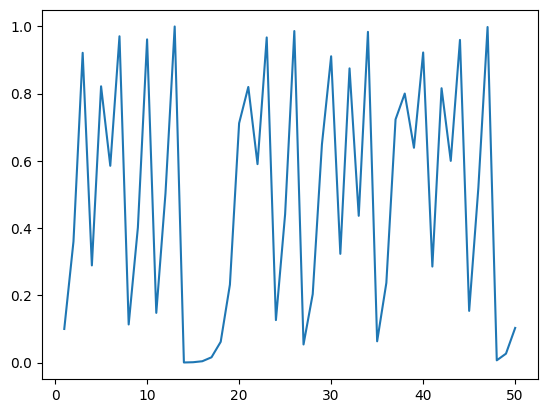

In [5]:
plot_logistic_eq(4, 0.1, 50)

### Constructing the Euler's method for solving Differential equations

In [ ]:
# Create the differential equation we are about to solve.
# In this case, we are solving the Newton's Law of Cooling
# dT/dt = k(Tr - T(t)); where k is a constant that models how
# the object exchange heat with the environment; T(t) is
# the temperature at time t. And Tr is the temperature of the
# environment.

def differential_eq(k, Tr, T):
    """
    
    """
    return k*(Tr - T)

In [ ]:
# Function for applying the Euler's method to solve the differential equation
def euler_method(differential_eq: Callable, *args):
    """
    This is the Euler's method for soliving differential equations.
    Args:
    -------
        differential_eq: Callable (function, method, class)
            The differential equation to solve
        *args: Tuple
            The arguments of the differential equation

    """
    pass